In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

In [15]:
# read data from file
df = pd.read_csv("final_train.csv")
y = df['Loan_Status']
X = df.drop('Loan_Status',axis = 1)

In [28]:
X = pd.get_dummies(X)  # one hot encoding

In [29]:
X.shape, y.shape

((614, 19), (614,))

In [16]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030,8.430109
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492,7.856707
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760,8.699515


In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,8.430109
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,7.856707
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,8.699515


In [5]:
from sklearn.model_selection import cross_val_score
all_scores = {}

In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuracy of LogisticRegression is %.2f' % (scores.mean()*100))
all_scores['LogisticRegression'] = ( scores.mean() * 100)

[0.81451613 0.75806452 0.78688525 0.86065574 0.81967213]
The accuracy of LogisticRegression is 80.80


e:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Text(0, 0, 'LogisticRegression')]

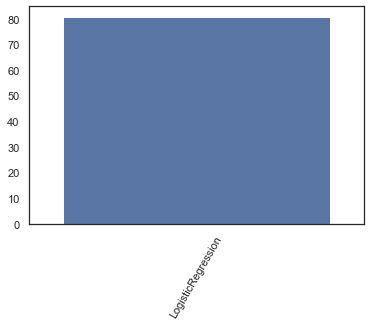

In [32]:
#all_scores.keys()
#all_scores.values()
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
plt.set_xticklabels(labels = all_scores.keys(),rotation=60)